# Introduction to Artificial Intelligence

# Assignment 14: Informed Search, Adversarial Search, Games

--- 

_Authors: Jacob Koehler, Dhavide Aruliah_

---
<a id="questions"></a>
## Questions

+ [**Question 1: Representing a Weighted Graph in Python**](#q-dict)
+ [**Question 2: Constructing a Weighted Graph in `networkx`**](#q-nx-dict)
+ [**Question 3: Setting up Dijkstra's Algorithm**](#q-setting-up)
+ [**Question 4: Using `heappush` & `heappop`**](#q-using-heap)
+ [**Question 5: Implementing Dijkstra's Algorithm**](#q-implementing-dijkstra)
+ [**Question 6: Applying Dijkstra's Algorithm in Romania**](#q-applying-dijkstra)
+ [**Question 7: Applying the A* Algorithm in Romania***](#q-finding)
+ [**Question 8: Using Distinct Heuristic Functions***](#q-using)
+ [**Question 9: Searching for Paths in a Road Network**](#q-searching)
+ [**Question 10: Constructing a Distance Heuristic for A***](#q-constructing-dist)
+ [**Question 11: Representing Games**](#q-representing-games)
+ [**Question 12: Identifying the Favored Player**](#q-favoring)
+ [**Question 13: Relating Minimax to a Search Algorithm**](#q-relating)
+ [**Question 14: Representing the Tic Tac Toe Board**](#q-representing)
+ [**Question 15: Creating the Initial Tic Tac Toe Board**](#q-initial)
+ [**Question 16: Determining a Row Winner**](#q-checking-row)
+ [**Question 17: Determining a Column Winner**](#q-checking-col)
+ [**Question 18: Checking for a Diagonal Winner**](#q-checking-diag)
+ [**Question 19: Computing the Utility**](#q-computing-utility)
+ [**Question 20: Using the `easyAI` Class**](#q-using-easyai)
+ [**Question 21: Identifying a `TicTacToe` Winner**](#q-winning-tictactoe)

## Pathfinding with Dijkstra and A*: Helping Shakey Find its Way

<center>
<img src = 'resource/asnlib/publicdata/shakey.jpg' width = 10%/>
</center>

---

## Background

The first part of this assignment explores applications of path finding through two classic algorithms: **Dijkstra's** and **A\***.

Dijsktra's algorithm was developed in the 1950s and bears the name of its first author, Edgar Dijkstra.  Dijkstra was working on experiments with Shakey the robot and autonomous transportation.  Dijkstra later recounted that he invented the algorithm in 20 minutes while resting on a walk.  This algorithm would be improved upon with the A* approach, also from the team working on Shakey.

If you are interested, the Stanford University Libraries has released a historical documentary of the project; please do watch the video below.  It provides a marvelous view into the early history of autonomous transportation.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
from warnings import filterwarnings
filterwarnings('ignore')

In [1]:
from IPython.display import HTML
HTML('<center><iframe width="560" height="315" src="https://www.youtube.com/embed/GmU7SimFkpU?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe></center>')

### Weighted graphs

To get started, we'll consider graphs with *weighted edges*; that is, given a graph, we can associate with each edge numerical weights (or even other kinds of data). Weighted graphs obviously have great utility in transportation or communication networks. An obvious interpretation of numerical edge weights is distance (e.g., lengths of flight paths or roads in a transportation network) but they could have other interpretations (e.g., capacity of a connection in a communication network, etc.).

<center>
<img src = resource/asnlib/publicdata/basic_graph.png>
</center>

In the image above, for example, the edge $(a,b)$ has weight 3 and the edge $(a,d)$ has weight 1. Remember, edges can be represented as tuples of vertices (in a directed graph, the order of the vertices tells the direction of the edge). When looking for paths in a weighted graph, the edge weights modify the notion of path length and hence alter the determination of efficient routes in a graph.

To deal with weighted graphs programmatically, we need to have programmatic representations. In Python, one straightforward representation uses a **dictionary of dictionaries** (extending the version of a dictionary of lists from the last assignment). In this case, the keys at the first level represent the nodes, and the values are dictionaries whose keys are adjacenct vertices and whose values are the weights associated with the edge connecting the two vertices. For example, in the graph above, we would represent vertex `a` as:

```python
{'a': {'b': 3, 'd': 1}}
```

Again, for undirected graphs, there can be redundancy in such a representation in deciding whether to represent, for example, the edge connection vertices `a` and `b` in both the dictionaries associated with vertices `a` and `b`.

<a id="q-dict"></a>
[Return to top](#questions)

---
### Question 1: Representing a Weighted Graph in Python

Construct a dictionary of dictionaries to represent the graph in this figure.

<center>
<img src = resource/asnlib/publicdata/basic_graph.png>
</center>

+ Save the result as `ans_1`.
+ You don't have to worry about repeating edges, i.e., if you have already described the edge connecting `a` and `b` in the dict for `a`, you need not describe that edge again in the dict for `b` (but it is acceptable if you do).
+ Every vertex should be represented as a key of the outermost dict.

In [53]:
### GRADED
### QUESTION 1
### Build a dict of dicts representation of the graph in the image
### above, and save it as ans_1 below.  Note that while you don't
### need to account for adjacencies twice, i.e., in node b we needn't add
### information about a if it is contained in node a's entry,
### every vertex should be represented as a key which may lead to slight
### redundancy with the last vertex f.
### YOUR SOLUTION HERE:
ans_1 = dict(a = dict(b = 3, d =1), b = dict(c = 2), c = dict(f = 5), 
             d = dict(e = 8, f = 12), e = dict(f = 4), f = dict(c = 5, d = 12, e = 4))


In [54]:
ans_1

{'a': {'b': 3, 'd': 1},
 'b': {'c': 2},
 'c': {'f': 5},
 'd': {'e': 8, 'f': 12},
 'e': {'f': 4},
 'f': {'c': 5, 'd': 12, 'e': 4}}

In [55]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###
G = ans_1 # Preserving result in more convenient identifier

To implement this with `networkx` involves adding a key `weight` within our dictionary.  For example, as we first represented the vertex `a`:

```python
'a': {'b':  3, 'd':  1}
```

we will add another layer of nested dictionaries that read as `{'weight': value}`.  For example, vertex `a` becomes:

```python
'a': {'b': {'weight': 3}, 'd': {'weight': 1}
```
This is the expected form of input for the `networkx` function `from_dict_of_dicts`.

<a id="q-nx-dict"></a>
[Return to top](#questions)

---
### Question 2: Constructing a Weighted Graph in `networkx`

Your task is to modify the definition of `ans_2a` below to be consistent with the requirements for `networkx`'s `from_dict_of_dicts`.
```python
ans_2a =  {'a': {'b': 3, 'd': 1},
         'b': {'c': 2},
         'c': {'f': 5},
         'd': {'e': 8, 'f': 12},
         'e': {'f': 4}}
```
+ Modify the definition of `ans_2a` by adding an internal layeer of `dict`s with the key `weight` associated with the corresponding numerical values.
+ Apply `nx.from_dict_of_dicts` to `ans_2a` and assign the result to `ans_2b`.

In [12]:
### GRADED
### QUESTION 2
### Adjust the dictionary ans_2a as above to be consistent with the
###  requirements networkx conventions.
### Use nx.from_dict_of_dicts on ans_2a & save as ans_2b.
### YOUR SOLUTION HERE:

mod = dict(a = dict(b = dict(weight = 3), d = dict(weight = 1)), b = dict(c = dict(weight = 2)), 
           c = dict(f = dict(weight = 5)), d = dict(e = dict(weight = 8), f = dict(weight =  12)), 
           e = dict(f= dict(weight =  4)))

ans_2a = mod
ans_2b = nx.from_dict_of_dicts(ans_2a)


In [6]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Dijkstra's Algorithm

Now that we know how to work with weighted edges, we can look for *shortests paths* in a graph (treating the weights as distances). The problem that Dijkstra's algorithm aims to solve is simple: you want start at vertex $A$ in a graph and traverse an efficient path (as measured by summing edge weights) to terminate at some different vertex $B$.  Dijkstra suggested the following:

1. Mark all nodes unvisited. Create a set of all the unvisited nodes called the *unvisited set*.

2. Assign to every node a tentative distance value from $A$: set it to $0$ for the initial node and to $+\infty$ for all other nodes. Set the initial node as the *current* node.
<a id="dijkstra-3"></a>
3. For the current node, consider all unvisited neighbours. Calculate their tentative distances to $A$ through the current node. Compare the newly calculated tentative distance to the current assigned value and assign the smaller one. For example, if the current node $X$ is marked with a distance of 6 from $A$, and the edge connecting $X$ with a neighbor $Y$ has length 2, then the distance from $Y$ to $A$ through $X$ will be 6 + 2 = 8. If $X$ was previously marked with a distance greater than 8 then change it to 8. Otherwise, keep the current value.

4. When we are done considering all of the unvisited neighbours of the current node, mark the current node as visited and remove it from the unvisited set. A visited node will never be checked again.

5. Otherwise, select the unvisited node that is marked with the smallest tentative distance, set it as the new "current node", and go back to step 3

This animated gif (from [Wikipedia Commons](https://commons.wikimedia.org/wiki/Main_Page)) demonstrates the algorithm in action.

<center>
<img src = "https://upload.wikimedia.org/wikipedia/commons/2/23/Dijkstras_progress_animation.gif" />
    </center>
    
You will walk through these steps to build your own implementation of Dijkstra's algorithm in a Python function. Following that, you will explore its implementation in the `networkx` library (along with A* for heuristic search).

<a id="q-setting-up"></a>
[Return to top](#questions)

---
### Question 3: Setting up Dijkstra's Algorithm

Your first task is to complete the missing lines in the Python function `setup_dijkstra` so that the appropriate output is returned:
```python
def setup_dijkstra(start):
    '''Initialize data structures for Dijkstra's algorithm
    INPUT:
      start: label of initial vertex
    OUTPUT:
      D: Dict of distances: initialize with start->0
      P: Dict for predecessprs (traversal tree, initially empty)
      Q: Priority queue (list) of tuples of form (distance, vertex)
         Initialize with tuple (0, start)
      S: Set for visited vertices (initially empty)
    '''
    D = ...
    P = ...
    Q = ...
    S = ...
    return D, P, Q, S
```

+ The input to `setup_dijkstra` is the label `start` of the initial node.
+ The four Python objects `setup_dijkstra` returns are:
  - `D`: a dictionary to store distances to each vertex;
  - `P`: a dictionary to represent a traversal tree (initially empty);
  - `Q`: a queue (list) to store nodes to visit; and
  - `S`: a set to store visited nodes (initially empty).
+ Dijkstra's algorithm begins with a starting vertex whose distance from itself is *zero*. Use this fact to initialize `D` and `Q` within `setup_dijkstra` (both of which have non-empty values).

In [62]:
### GRADED
### QUESTION 3
### Complete the function setup as described above.
def setup_dijkstra(start):
    '''Initialize data structures for Dijkstra's algorithm
    INPUT:
      start: label of initial vertex
    OUTPUT:
      D: Dict of distances: initialize with start->0
      P: Dict for predecessprs (traversal tree, initially empty)
      Q: Priority queue (list) of tuples of form (distance, vertex)
         Initialize with tuple (0, start)
      S: Set for visited vertices (initially empty)
    '''
    D = {start : 0}
    P = dict()
    Q = [(0, start)]
    S = set()
###
### YOUR CODE HERE
###
    return D, P, Q, S

In [27]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


You may notice in this Python implementation of `setup_dijkstra`, the dictionary `D` of putative distances is initialized with only one key-value pair (that for the vertex `start` being distance `0` from itself). In Dijkstra's algorithm, the initial state has all vertices being at distance $+\infty$ from the `start` vertex except `start` (which is at distance `0` from itself). This is most simply implemented in Python using [the `dict` method `get`](https://docs.python.org/3/library/stdtypes.html#mapping-types-dict):

> **`get`**`(`*`key[, default]`*`)`
>
>    Return the value for *`key`* if *`key`* is in the dictionary, else *`default`*. If *`default`* is not given, it defaults to `None`, so that this method never raises a `KeyError`.

Thus, in our context, with the dictionary `D` storing putative distances of vertices to the initial vertex `start`, the invocation `D.get(V,float('inf'))` works as required. Intuitively, this means that our first steps would certainly be an improvement on infinite distance. Whenever a node is found to be at distance $+\infty$ from `start`, its distance can be updated (if a shorter path is found) and the corrected distance pushed into the heap.

### Relaxation

The function `relax_dijkstra` provided below implements the [third step](#dijkstra-3) of Dijkstra's algorithm described above. The Python dictionary `get` method discussed above is used to advantage for the underlying logic. The inputs needed are:

+ a graph `G` represented a dictionary of dictionaries with weights (i.e., as in Question 1 rather than as in Question 2).
+ two vertices `u` and `v`
+ the distance & predecessor dicts `D` and `P` as provided by `setup_dijkstra`.

Practically, the relaxation function is used to explore all neighbors of a vertex, and to track of the weights of edges traversed to its neighbors. The dictionaries `D` and `P` are updated in place, so calling `relax_dijkstra` at every vertex until reaching the goal builds up the shortest paths.

In [57]:
def relax_dijkstra(G, start, neighbor, D, P):
    '''
    This function updates the distance & predecessor dictionaries
    D & P by comparing their putative distances to the start vertex.
    ------
    G: Graph as dict of dicts
    start: start vertex
    neighbor: neighbor vertex
    D: dict of dicts keeping track of distances
    P: predecessor dictionary to track shortest path trees
    '''
    # Convenient shorthand for infinity
    inf = float('inf')
    # Shortcut estimate
    d = D.get(start, inf) + G[start][neighbor]
    # Compare shortcut to existing distance
    if d < D.get(neighbor, inf):
        # Update D and P accordingly
        D[neighbor], P[neighbor] = d, start
        print(D, P)
        return True

In [29]:
G = {'a': {'b': 3, 'd': 1},
     'b': {'a': 3, 'c': 2},
     'c': {'b': 2, 'f': 5},
     'd': {'a': 1, 'e': 8, 'f': 12},
     'e': {'d': 8, 'f': 4},
     'f': {'c': 5, 'd': 12, 'e': 4}}

In [30]:
### Implementing on our graph
P = {}
for u in G:
    for v in G[u]:
        relax_dijkstra(G, u, v, {u: 0}, P)

{'a': 0, 'b': 3} {'b': 'a'}
{'a': 0, 'd': 1} {'b': 'a', 'd': 'a'}
{'b': 0, 'a': 3} {'b': 'a', 'd': 'a', 'a': 'b'}
{'b': 0, 'c': 2} {'b': 'a', 'd': 'a', 'a': 'b', 'c': 'b'}
{'c': 0, 'b': 2} {'b': 'c', 'd': 'a', 'a': 'b', 'c': 'b'}
{'c': 0, 'f': 5} {'b': 'c', 'd': 'a', 'a': 'b', 'c': 'b', 'f': 'c'}
{'d': 0, 'a': 1} {'b': 'c', 'd': 'a', 'a': 'd', 'c': 'b', 'f': 'c'}
{'d': 0, 'e': 8} {'b': 'c', 'd': 'a', 'a': 'd', 'c': 'b', 'f': 'c', 'e': 'd'}
{'d': 0, 'f': 12} {'b': 'c', 'd': 'a', 'a': 'd', 'c': 'b', 'f': 'd', 'e': 'd'}
{'e': 0, 'd': 8} {'b': 'c', 'd': 'e', 'a': 'd', 'c': 'b', 'f': 'd', 'e': 'd'}
{'e': 0, 'f': 4} {'b': 'c', 'd': 'e', 'a': 'd', 'c': 'b', 'f': 'e', 'e': 'd'}
{'f': 0, 'c': 5} {'b': 'c', 'd': 'e', 'a': 'd', 'c': 'f', 'f': 'e', 'e': 'd'}
{'f': 0, 'd': 12} {'b': 'c', 'd': 'f', 'a': 'd', 'c': 'f', 'f': 'e', 'e': 'd'}
{'f': 0, 'e': 4} {'b': 'c', 'd': 'f', 'a': 'd', 'c': 'f', 'f': 'e', 'e': 'f'}


Notice that we have added a `print()` statement so that the distance and predecessor dictionary can be viewed.  The first two lines can be understood as first consider the edge `ab` of distance 3.  Compare this to `ad`, ad is less, so update our information about the closest adjacent vertex.

<center>
    <img src = 'resource/asnlib/publicdata/relax.png'/>
    </center>

Below, we redefine our `relax_dijkstra` function so that we can use without the print statement.

In [58]:
def relax_dijkstra(G, start, neighbor, D, P):
    '''
    This function updates the distance & predecessor dictionaries
    D & P by comparing their putative distances to the start vertex.
    ------
    G: Graph as dict of dicts
    start: start vertex
    neighbor: neighbor vertex
    D: dict of dicts keeping track of distances
    P: predecessor dictionary to track shortest path trees
    '''
    # Convenient shorthand for infinity
    inf = float('inf')
    # Shortcut estimate
    d = D.get(start, inf) + G[start][neighbor]
    # Compare shortcut to existing distance
    if d < D.get(neighbor, inf):
        # Update D and P accordingly
        D[neighbor], P[neighbor] = d, start
        return True

### Working with a Priority Queue (Heap)

The last piece required to implement Dijkstra's algorithm is a *heap* or *priority queue* to maintain the vertices visited. This data structure permits easy retrieval of the vertex with the lowest distance from the `start` vertex. In Python, the queue is maintained as a list of tuples of the form `(distance, vertex)`. The [Python built-in module `heapq`](https://docs.python.org/3/library/heapq.html) contains functions like `heappush` & `heappop` to add items to and remove items from a priority queue cleanly. Notably, when invoking `heappop`, the item with the lowest pirority (or distance in this case) will be removed before all others. When invoking `heappush`, items are added to the queue while maintaining a structure to enable easy retrieval of the smallest item.

Here is an illustrative example from the [`heapq` module documentation](https://docs.python.org/3/library/heapq.html#basic-examples)

In [63]:
from heapq import heappush, heappop

In [33]:
h = []
heappush(h, (5, 'write code'))
heappush(h, (7, 'release product'))
heappush(h, (1, 'write spec'))
heappush(h, (3, 'create tests'))
heappop(h)

(1, 'write spec')

<a id="q-using-heap"></a>
[Return to top](#questions)

---
### Question 4: Using `heappush` & `heappop`

Complete the function `visited_or_not` (as shown below) using `heappop` (as illustrated above).
+ The inputs are the priority queue `Q` of vertices to visit with tentative distances to the start and the set `S` of vertices visited.
+ There are no outputs (it returns `None`) but it *does* modify both inputs in-place.
+ Your task is to complete the interior of the `while` loop.
```python
def visited_or_not(Q, S):
    '''
    Builds up set S of visited vertices using priority queue Q.
    INPUT:
      Q: Priority queue (list) of tuples of form (distance, vertex)
      S: Set for visited vertices
    OUTPUT:
      None: WARNING, this modifies Q & S in-place!
    '''    
    while Q:
        # pop a (distance, vertex) tuple from priority queue Q
        # if the vertex is not in S, add it to S
    return None
```

In [142]:
### GRADED
### QUESTION 4
### Complete the function visited_or_not as described above
def visited_or_not(Q, S):
    '''
    Builds up set S of visited vertices using priority queue Q.
    INPUT:
      Q: Priority queue (list) of tuples of form (distance, vertex)
      S: Set for visited vertices
    OUTPUT:
      None: WARNING, this modifies Q & S in-place!
    '''    
###
### YOUR CODE HERE
###
    while Q:
      # pop a (distance, vertex) tuple from priority queue Q
        dist = heappop(Q)
        vert = dist[1]
      # if the vertex is not in S, add it to S
        if vert in S: continue
        S.add(vert)   
        
    return None


In [16]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


The purpose of the preceding was to gain familiarity with the mechanics of using the function `heappop` and working with a priority queue.

<a id="q-implementing-dijkstra"></a>
[Return to top](#questions)

---
### Question 5: Implementing Dijkstra's Algorithm

You can finally implement Dijkstra's algorithm.
+ The basic implementation here has most of the pieces provided.
+ The one missing line (within the `for` loop) requires a `heappush`
  to push the updated distance information onto the heap.
 we want to update our queue to reflect the results of the relaxation.  Here, we can use the `heappush` function to attach the new information resulting from our relaxation into the the queue.

```python
def dijkstra(graph, start):
  '''
  This function implements Dijkstra's algorithm on a graph,
  determining shortest distances from start to all vertices
  in the graph.
  INPUT:
     graph: dict of dicts to represent weighted graph
     start: starting vertex
  OUTPUT:
     D : dict of distances of each vertex to start
     P : dict of predecessors (for paths back to start) 
  Example:
      G = {'a': {'b': 3, 'd': 1},
           'b': {'a': 3, 'c': 2},
           'c': {'b': 2, 'f': 5},
           'd': {'a': 1, 'e': 8, 'f': 12},
           'e': {'d': 8, 'f': 4},
           'f': {'c': 5, 'd': 12, 'e': 4}}
      dijkstra(G, 'a') ====> (D, P) where
        ({'a': 0, 'b': 3, 'c': 5, 'd': 1, 'e': 9, 'f': 10},
         {'b': 'a', 'c': 'b', 'd': 'a', 'e': 'd', 'f': 'c'})
  '''
  D, P, Q, S = setup_dijkstra(start)
  while Q:                              # Unprocessed nodes?
    _, u = heappop(Q)                   # Get closest node
    if u in S: continue                 # If visited skip
    S.add(u)                            # Visit otherwise
    for v in graph[u]:                  # Examine neighbors
      relax_dijkstra(graph, u, v, D, P) # Relax edges
      ### INSERT MISSING LINE HERE
  return D,  P
```


In [61]:
### GRADED
### QUESTION 5
### Complete the function dijkstra below.
### Use the template code above to fill in the body.
### your goal is to determine when and what you 
### want to add to the heap!
def dijkstra(graph, start):
    '''
    This function implements Dijkstra's algorithm on a graph,
    determining shortest distances from start to all vertices
    in the graph.
    INPUT:
    graph: dict of dicts to represent weighted graph
    start: starting vertex
    OUTPUT:
    D : dict of distances of each vertex to start
    P : dict of predecessors (for paths back to start) 
    Example:
    G = {'a': {'b': 3, 'd': 1},
         'b': {'a': 3, 'c': 2},
         'c': {'b': 2, 'f': 5},
         'd': {'a': 1, 'e': 8, 'f': 12},
         'e': {'d': 8, 'f': 4},
         'f': {'c': 5, 'd': 12, 'e': 4}}
    dijkstra(G, 'a') ====> (D, P) where
      ({'a': 0, 'b': 3, 'c': 5, 'd': 1, 'e': 9, 'f': 10},
       {'b': 'a', 'c': 'b', 'd': 'a', 'e': 'd', 'f': 'c'})
    '''
###
### YOUR CODE HERE
###
    D, P, Q, S = setup_dijkstra(start)
    while Q:                                # Unprocessed nodes?
        _, u = heappop(Q)                   # Get closest node
        if u in S: continue                 # If visited skip
        S.add(u)                            # Visit otherwise
        for v in graph[u]:                  # Examine neighbors
            relax_dijkstra(graph, u, v, D, P)   # Relax edges
            ### INSERT MISSING LINE HERE
            heappush(Q, (D[v], v))
    return D,  P



In [51]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


---
## Heuristic search with A*

The A* algorithm is a slight variant of Dijkstra's algorithm.  We introduce a *heuristic function* $h$ that helps in choosing the node progression and eliminates some of the work that Dijkstra's algorithm requires.

The animated gif below demonstrates the improvement on Dijkstra when we have a heuristic function in place.  In essence, this helps us to keep our focus on the goal state of the traversal and can trim the amount of routes considered.

<center>
    <img src = 'https://upload.wikimedia.org/wikipedia/commons/5/5d/Astar_progress_animation.gif'/>
</center>

Below is an implementation of A* with a general heuristic function `h`.

In [66]:
def a_star(G, s, t, h):
    '''
    G: graph
    s: start vertex
    t: terminal vertex
    h: heuristic function
    '''
    inf = float('inf')
    P, Q = {}, [(h(s), None, s)]
    while Q:
        d, p, u = heappop(Q)
        if u in P: continue
        P[u] = p
        if u == t: return d - h(t), P
        for v in G[u]:
            w = G[u][v] - h(u) + h(v) #incorporating the heuristic
            heappush(Q, (d + w, u, v))
    return inf, None

Examples of heuristic function are *Euclidean distance* or *Manhattan distance* (defined later).  For instance, in our Romania map example, from the lectures, we could use the straight-line geographic distance between points as the heuristic function. Most importantly, a heuristic function of the form $h(t) = 0$ yields Djisktra's algorithm.

We will move to implementing these algorithms using the `network_x` library.  For us to implement the `a_star` above would involve additional information about the orientation of points in our simple graph or the introduction of a coordinate system to allow easy use of the metric.



Now, we will implement `Dijkstra` on a weighted graph representing the Romania map from class.

<img src = 'resource/asnlib/publicdata/romania_map.png'/>

In [67]:
import networkx as nx

romania_map = {'Arad': {'Sibiu': {'weight':140}, 'Timisoara': {'weight':118}, 'Zerind': {'weight':75}},
 'Bucharest': {'Fagaras': {'weight':211}, 'Giurgiu': {'weight':90}, 'Pitesti': {'weight':101}, 'Urziceni': {'weight':85}},
 'Craiova': {'Drobeta': {'weight':120}, 'Pitesti': {'weight':138}, 'Rimnicu': {'weight':146}},
 'Drobeta': {'Mehadia': {'weight':75}},
 'Eforie': {'Hirsova': {'weight':86}},
 'Fagaras': {'Sibiu': {'weight':99}},
 'Hirsova': {'Urziceni': {'weight':98}},
 'Iasi': {'Neamt': {'weight':87}, 'Vaslui': {'weight':92}},
 'Lugoj': {'Mehadia': {'weight':70}, 'Timisoara': {'weight':111}},
 'Oradea': {'Sibiu': {'weight':151}, 'Zerind': {'weight':71}},
 'Pitesti': {'Rimnicu': {'weight':97}},
 'Rimnicu': {'Sibiu': {'weight':80}},
 'Urziceni': {'Vaslui': {'weight':142}}}

romania_graph = nx.from_dict_of_dicts(romania_map)

<a id="q-applying-dijkstra"></a>
[Return to top](#questions)

---
### Question 6: Applying Dijkstra's Algorithm in Romania

Your task here is to apply Dijkstra's algorithm as implemented in `networkx` to the graph `romania_graph`.
+ Determine the shortest path from `Arad` to `Bucharest` using `nx.dijkstra_path`.
+ Assign the resulting path to `ans_6`.

In [68]:
### GRADED
### QUESTION 6
### Use the networkx dijkstra_path()
### method to determine the shortest path from 
### Arad to Bucharest.  Save your results to ans_6 below
### This should be a list of nodes.
ans_6 = nx.dijkstra_path(romania_graph, 'Arad', 'Bucharest')
### Verification:
print('Shortest path from Arad to Bucharest:\n{}'.format(ans_6))

Shortest path from Arad to Bucharest:
['Arad', 'Sibiu', 'Rimnicu', 'Pitesti', 'Bucharest']


In [22]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id="q-finding"></a>
[Return to top](#questions)

---
### Question 7: Applying the A* Algorithm in Romania

Similarly, we can use the `networkx` implementation of A* out of the box.
+ Apply `nx.astar.astar_path` to find the shortest path from `Arad` to `Bucharest` in `romania_graph`. Assign the result to `ans_7_path`.
+ You won't create a heuristic function `h` here, so the behavior should be identical to Dijkstra's algorithm.
+ Apply `nx.astar.astar_path_length` to find the *length* of the shortest path from `Arad` to `Bucharest` in `romania_graph`. Assign the result to `ans_7_length`.

In [69]:
### GRADED
### QUESTION 7
### Use the networkx implementation of A* to get the shortest
###    path from Arad to Bucharest and its length.
### Save your path as a list to ans_7_path & the length of the
###   shortest path to ans_7_length.
### YOUR ANSWER HERE
ans_7_path = nx.astar.astar_path(romania_graph, 'Arad', 'Bucharest')
ans_7_length = nx.astar.astar_path_length(romania_graph, 'Arad', 'Bucharest')


In [71]:
ans_7_path, ans_7_length

(['Arad', 'Sibiu', 'Rimnicu', 'Pitesti', 'Bucharest'], 418)

In [24]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


As mentioned, our Romania example could incorporate something like latitude and longitude coordinates into its representation and we could define a heuristic based on Pythagorean distances between these values.  Below, we demonstrate this with a simple example from the `networkx` documentation using a `grid_graph`, which positions nodes according to `(x,y)` tuples.  As such, we can define a distance function based on euclidean distance as shown below.

In [72]:
# Generate simple grid graph
G = nx.grid_graph(dim=[3,4])

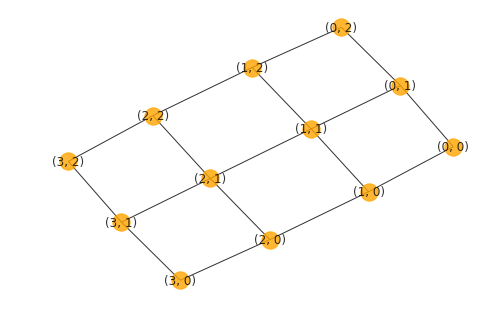

In [73]:
nx.draw(G, with_labels=True, node_color='orange', node_size=300, alpha = 0.8)

In [74]:
def dist(a, b):
    (x1, y1) = a # Unpacks coordinates from tuple
    (x2, y2) = b # Unpacks coordinates from tuple
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
print(nx.astar_path(G,(0,0),(3,2), dist))

[(0, 0), (1, 0), (2, 0), (2, 1), (3, 1), (3, 2)]


**Euclidean vs. Manhattan Distance**


<center>
    <img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Manhattan_distance.svg/400px-Manhattan_distance.svg.png'/ width = 25% height = 50%>
         </center>

<a id="q-using"></a>
[Return to top](#questions)

---
### Question 8: Using Distinct Heuristic Functions

Your task here is to complete the function `manhattan_dist` below to be compatible with `nx.astar_path`.
+ You can use the function `dist` above as a template.
+ Assume that the inputs will be two tuples of length 2 (as in `dist`).
+ In two dimensions, the [*Manhattan distance* or *taxicab distance*](https://en.wikipedia.org/wiki/Taxicab_geometry) can be defined as
$$ \mathtt{manhattan\_dist}(a,b) = |a_1-b_1| + |a_2-b_2|$$

In [75]:
### GRADED
### QUESTION 8
### Complete the function manhattan_dist below that 
### takes in two nodes a, b and returns
### the manhattan or taxi-cab distance between them.

def manhattan_dist(a, b):
    '''
    This function takes in two tuples of the form (x,y)
    and computes the manhattan distance between the two.
    '''
###
### YOUR CODE HERE
###
    (x1, y1) = a # Unpacks coordinates from tuple
    (x2, y2) = b # Unpacks coordinates from tuple
    d1 = a[0] - b[0]
    d2 = a[1] - b[1]
    return abs(d1) + abs(d2)

In [29]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


As a next example, we have a road network from Sioux Falls, Iowa. You can find more data on transportation networks here: 
https://github.com/bstabler/TransportationNetworks. 
The code below was adapted from the networkx tutorial here: 
http://avinashu.com/tutorial/pythontutorialnew/NetworkXBasics.html.  
This is simply to demonstrate a path search algorithm using real data to determine a shortest path.

In [78]:
# READ IN DATA ON NODES AND EDGES
G3 = nx.DiGraph() # a *directed* graph
with open("resource/asnlib/publicdata/SiouxFalls_flow.txt", "r") as f:
    line = f.readline()
    line = f.readline()
    while len(line):
        l = line.split()
        fromnode = int(l[0])
        to = int(l[1])
        volume = float(l[2])
        cost = int(float(l[3]))
        G3.add_edge(fromnode, to, weight = cost)
        line = f.readline()

In [79]:
with open("resource/asnlib/publicdata/SiouxFalls_node.txt", "r") as f:
    line = f.readline()
    line = f.readline()
    while len(line):
        line = line.strip(';')
        l = line.split()
        node = int(l[0])
        pos1 = float(l[1])/10000
        pos2 = float(l[2])/10000
        G3.add_node(node, pos=(pos1,pos2))
        line = f.readline()

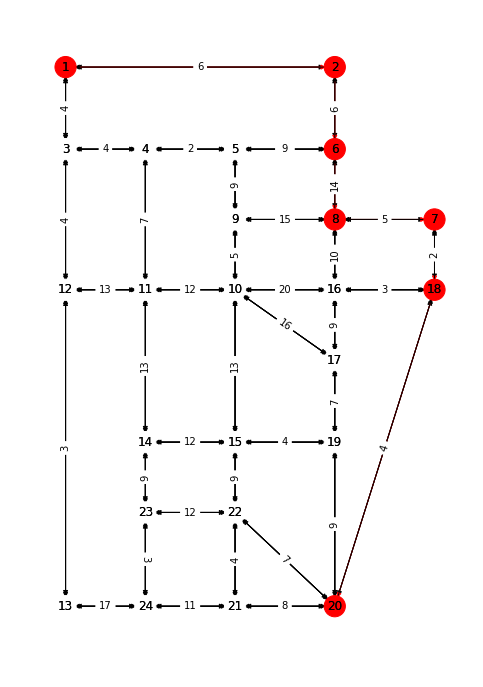

In [80]:
# CREATE PLOT OF NETWORK
plt.figure(figsize=(8,12))
# The positions of each node are stored in a dictionary
node_pos=nx.get_node_attributes(G3,'pos')
# The edge weights of each arcs are stored in a dictionary
arc_weight=nx.get_edge_attributes(G3,'weight')
# Determine the shortest path
sp = nx.dijkstra_path(G3,source = 1, target = 20)
# Create a list of arcs in the shortest path using the zip command and store it in red edges
red_edges = list(zip(sp,sp[1:]))
# If the node is in the shortest path, set it to red, else set it to white color
node_col = ['white' if not node in sp else 'red' for node in G3.nodes()]
# If the edge is in the shortest path set it to red, else set it to white color
edge_col = ['black' if not edge in red_edges else 'red' for edge in G3.edges()]
# Draw the nodes
nx.draw_networkx(G3, node_pos,node_color= node_col, node_size=450)
# Draw the node labels
nx.draw_networkx_labels(G3, node_pos,node_color= node_col)
# Draw the edges
nx.draw_networkx_edges(G3, node_pos,edge_color= edge_col)
# Draw the edge labels
nx.draw_networkx_edge_labels(G3, node_pos,edge_color= edge_col, edge_labels=arc_weight)
# Remove the axis
plt.axis('off');

<a id="q-searching"></a>
[Return to top](#questions)

---
### Question 9: Searching for Paths in a Road Network

Use the `networkx` object `G3` just created to compute the following. 
+ Apply `nx.dijkstra_path` to determine a shortest path from node `13` to node `6`. Assign the result to `ans_9_path`.
+ Apply `nx.dijkstra_path_length` to determine the *length* of a shortest path from node `13` to node `6`. Assign the result to `ans_9_length`.

In [94]:
### GRADED
### QUESTION 9
### Save the shortest path from node 13 to node 6 as ans_9_path.
### Save the length of the path to ans_9_length.
### YOUR SOLUTION HERE:
ans_9_path = nx.dijkstra_path(G3, 13, 6)
ans_9_length = nx.dijkstra_path_length(G3, 13, 6)


In [95]:
ans_9_path, ans_9_length

([13, 12, 3, 4, 5, 6], 22)

In [34]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id="q-constructing-dist"></a>
[Return to top](#questions)

---
### Question 10: Constructing a Distance Heuristic for A*

Your task here is to apply A* to the graph `G3` describing the Sioux Falls transportation nextwork data. You can use the `networkx` implementation, but you'll also provide a heuristic function `sioux_dist`.
+ The function `sioux_dist` will accept two vertex labels from the `Graph` object `G3` as input.
+ Individual vertices can be indexed from `G3.node` with an appropriate label; for each vertex `a`, you can access a dict `G3.node[a]` with a single key `pos` whose value is a 2-tuple with the Cartesian coordinates of the node.
+ The distance computed will be the usual Euclidean distance, i.e.,
  $$ \sqrt{\left(a_1-b_1\right)^2 + \left(a_2-b_2\right)^2} $$
  being the distance between two points $a=(a_1,a_2)$ and $b=(b_1,b_2)$.

In [100]:
G3.node[3]['pos']

(5.0, 44.0)

In [101]:
### GRADED
### QUESTION 10
### Complete the function sioux_dist to determine the Euclidean distance
###    between two nodes in the graph G3.
def sioux_dist(a, b):
    '''
    Compute the euclidean distance between nodes a & b in graph G3
    '''
###
### YOUR CODE HERE
###
    nod1 = G3.node[a]['pos']
    nod2 = G3.node[b]['pos']
    return dist(nod1, nod2)
print('Using sioux_dist, A* determines the path\n{}\nfrom node 3 to node 19.'
       .format(nx.astar_path(G3, 3, 19, sioux_dist)))

Using sioux_dist, A* determines the path
[3, 4, 5, 9, 10, 15, 19]
from node 3 to node 19.


In [106]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


# Adversarial Search
<figure>
  <img src="resource/asnlib/publicdata/johnniac.jpg" alt="The Johnniac" style="width:100%">
    <figcaption><i>The Johnniac of Simon and Lewell</i>.</figcaption>
</figure>
    
---
In this section, we will introduce problems motivated by the example of tic-tac-toe in the lecture and *Chapter 5: Artificial Intelligence a Modern Approach*.  Your goal will be to examine some foundational elements of the problems much as those addressed above in our search problems in the context of adversarial search problems.  To begin, we will explore some of the fundamental ideas in **game theory** and its history.  

First, is a definition of a *game*. According to Straffin's *Game Theory and Strategy*, a **game** is any scenario in which:

<div class="alert alert-info" role="alert">
    <li>There are at least two <i>players</i></li>
    <li>Each player has a number of possible <i>strategies</i></li>
    <li>The strategies chosen by each player determine the <i>outcome</i> of the game.</li>
    <li>Associated to each possible outcome of the game is a colletion of numerical <i>payoffs</i>, one to each player.</li>
</div>


*Straffin, p3*

To begin, lets consider a scenario in which there are two players: Row and Column.  The players each have two strategies -- $A$ or $B$. There are different consequences for the four possible pairings of these strategies depending, and we can represent an example of such a game with a *pay-off matrix* as follows:

<table class="table">
    <caption>Row vs. Column</caption>
  <thead>
    <tr>
      <th scope="col"> </th>
      <th scope="col">A</th>
      <th scope="col">B</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th scope="row">A</th>
      <td>4</td>
      <td>-3</td> 
    </tr>
    <tr>
      <th scope="row">B</th>
      <td>0</td>
      <td>3</td>
    </tr> 
  </tbody>
</table>


This table is from only the Row player perspective, and we will view each outcome for player Row to have the equal and opposite outcome or *pay-off* for player Column.  To begin our exploration, we need first to represent and simulate playing the game a variety of times to verify our intutions.

### Representation of Games

To start, we will use nested lists to represent games.  A **nested list** is a list of lists in Python.  For example:

```python
[[1,0],[0,1]]
```

could be interpreted as a matrix

$$\begin{bmatrix}
1 & 0 \\
0 & 1 \\
\end{bmatrix}
$$

<a id="q-representing-games"></a>
[Return to top](#questions)

---
### Question 11: Representing Games

Your first task is to represent the following pay-off matrix in Python as a list of lists:

| $\ $ |  A  |  B  |  C  |  D  | 
| ----- | ----- | ----- | ----- | ----- |
| **A**     | 12    | -1   |   1 |    0 |
| **B**      |    5 |    1 |   7 |   -20 |
| **C**   |    3 |    2 |    4 |    3 | 
| **D**    |   -16 |   0 |   0 |    16 | 

+ Each inner list corresponds to a row of the table above.
+ Assign your resulting data structure to the identifier `ans_12`.

In [3]:
### GRADED
### QUESTION 11
### Construct a list of lists as specified above.
### Save to the variable ans_11.
### YOUR ANSWER BELOW:
ans_11 = [[12, -1, 1, 0],
          [5, 1, 7, -20],
          [3, 2, 4, 3],
          [-16, 0 ,0, 16]]


In [38]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id="q-favoring"></a>
[Return to top](#questions)

---
### Question 12: Identifying the Favored Player

You can now examine the pay-offs in the table from Question 11 to determine if the game is fair.
+ If the game corresponding to the table is fair, the expectation for each player would be equal.
+ Provide your answer as a Python string chosen from
   + `row` (if the row player has an advantage)
   + `column` (if the column player has an advantage)
   + `none` (if neither has an advantage)
+ Assign the result to `ans_12`.

In [78]:
### GRADED
### QUESTION 12
### Does the row or column player have an advantage?
### Assign the string 'row','column', or 'none' to ans_12.
### YOUR ANSWER BELOW:
ans_12 = 'row'


In [40]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### Sequential Play

An alternative structure to a game would be to allow one player to move and subsequently the other player to react and choose to play aware of the result of a first players move.  The image below is from [Wikipedia's page on the Minimax algorithm](https://en.wikipedia.org/wiki/Minimax).

![](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Minimax.svg/800px-Minimax.svg.png)

The table below has `max` as the row player and `min` as the column player from the diagram above.  The payoffs are from `max`'s point of view.  Your goal is to fill in the remaining elements of the table representation of the payoff matrix for the game tree represented above.  There are only two possible moves $A$ and $B$, move $A$ is always the left branch and $B$ the right branch.

| $~$ | $A$ | $B$ |
| ---- | ---- | ---- |
| $A$ |   (a)  |   (b)  |
| $B$ | (c)    |  (d)   |

### The MiniMax Algorithm

Returning to the game tree example above, we want to determine the best strategy for Max or the row player.  The payoffs of $\infty$ and $-\infty$ are meant to denote a *win* and *loss* respectively for the row player Max.  The most basic of the algorithms we discussed was the MiniMax algorithm that considers all possible states of the game and ascends the tree by alternately choosing the minimum and maximum payoffs at each level.  Thus, we start by considering all of the row players possible moves, and next, all the column players potential responses.  



![](https://upload.wikimedia.org/wikipedia/commons/e/e1/Plminmax.gif)

The problem with the basic MiniMax algorithm is that you first traverse all the way down every single branch of the tree and subsequently back up depending on the maximum and minimum values.  The `NegaMax` algorithm offers an improvement on this computation load by recognizing that if a branch begins with a value greater or less (depending on whether we are at a `max` or `min` node) we don't need to traverse further.  This is still the minimax, just not using as much computational resources.  This is the implementation we see demonstrated above.


<a id="q-relating"></a>
[Return to top](#questions)

---
### Question 13: Relating Minimax to a Search Algorithm

Which of the following search strategies describes the Minimax algorithm best?
+ Your choices are:
  + (a) Breadth-First Search
  + (b) Depth-First Search
  + (c) Neither
  + (d) Both
+ Provide your answer as a Python string (don't worry about upper or lower case).
+ Assign the result to `ans_13`.

In [77]:
### GRADED
### QUESTION 13
### Which of the following strategies describes the Minimax algorithm best?
### Provide your answer as a Python string.
### For instance, ans_13 = 'c'
### a) Breadth-First Search
### b) Depth-First Search
### c) Neither
### d) Both
### YOUR ANSWER BELOW:
ans_13 = 'b'


In [42]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### Tic Tac Toe

To demonstrate some of the fundamentals in analyzing a game by building and traversing a game tree, we will use the game of Tic Tac Toe.  We use the game to cover some of the fundamental ideas of connecting games to search problems.  To do so, we will write basic functions to implement the game and then use the EasyAI library to implement the Negamax algorithm to play against the computer in the game.  In this section, our functions will focus on:

- An **`initial_state`** function
- A **`player`** function
- An **`action`** function
- A **`result`** function
- A **`terminal_test`** function
- A **`utility`** function

To begin, we need to decide on some conventions for our board.  Let us define a $3 \times 3$ board as a nested list of lists.  Here, we will use empty strings to denote an empty cell.  

<a id="q-representing"></a>
[Return to top](#questions)

---
### Question 14: Representing the Tic Tac Toe Board

In [7]:
### GRADED
### QUESTION 14
### Create an empty 3 by 3 game board represented using
### a nested list of lists of empty strings.
### Assign your response to the identifier ans_14
### YOUR ANSWER BELOW:
ans_14 = [['', '', ''],
          ['', '', ''],
          ['', '', '']]


In [44]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id="q-initial"></a>
[Return to top](#questions)

---
### Question 15: Creating the Initial Tic Tac Toe Board

**`initial_state`**

Now, we write a function called initial state that takes no arguments and returns the initial state of the game board. 

```python
def initial_state():
    '''
    This function returns an initial
    empty tic-tac-toe board.
    '''
    return board
```

In [9]:
### GRADED
### QUESTION 15
### Complete the function below.  Your 
### answer should return a game board
### like the answer from Question 14
### YOUR ANSWER BELOW:
def initial_state():
    '''
    This function will return an empty game board when
    called.  
    '''
###
### YOUR CODE HERE
###
    return ans_14


In [46]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**`player`**

Now, we need to write a `player` function.  Here, we assume that player $X$ will always go first.  Our function will then take a board as an argument, and return the Python string `'X'` or `'O'` according to which player's move it is.

Notice that the character returned is upper case and the character `'O'` is the letter "O" and *not* the numeral for zero.

In [12]:
def player(board):
    '''
    This function takes in a board
    of tic-tac-toe, and determines
    whose move it is
    '''
    x_count = 0
    o_count = 0
    for row in board:
        for column in row:
            if column == 'X':
                x_count += 1
            elif column == 'O':
                o_count += 1
    if x_count == o_count:
        return 'X'
    else:
        return 'O'

**`actions`**

Now that we have a board and a way to determine the player, we want to take in a game board and return a set of all possible actions.  Here, we want to return a set of (row,column) tuples that identify possible moves for a player given the state of the board.

```python
def actions(board):
    ...
    return [(row,column), (row, column), ... ]
```

In [13]:
def actions(board):
    '''
    This function takes in a board and returns the
    a list of tuples of possible next moves.
    '''
    moves = []
    for r, row in enumerate(board):
        for c, val in enumerate(row):
            if val == '':
                moves.append((r, c))
    return set(moves)

In [49]:
board = [['X','X',''],['O','O',''],['','O','X']]
actions(board)

{(0, 2), (1, 2), (2, 0)}

**`result`**

This function should take in a board and (row, column) tuple.  We will return a board having made the move for the appropriate player at the given location.

In [14]:
def result(board, tup):
    '''
    This function takes in a tic tac toe
    board and tuple of row and column location to 
    place the players move
    '''
    p = player(board)
    board[tup[0]][tup[1]] = p
    return board

**`terminal`**

This function will take in a game board and return a boolean value for whether or not the board is in a terminal state (i.e., whether or not any further moves are possible).


In [16]:
def terminal(board):
    '''
    Given a game board, this function
    returns whether or not the board is in
    a terminal state.
    '''
    return not bool(actions(board))

In [17]:
board_1 = [['', '', 'X'],
          ['O', '', ''],
          ['', '', '']]

board_2 = [['X', 'O', 'X'],
          ['O', '', ''],
          ['', 'X', '']]

board_3 = [['X', 'O', 'X'],
          ['O', 'X', 'O'],
          ['O', 'X', 'X']]

print(terminal(board_1))
print(terminal(board_2))
print(terminal(board_3))

False
False
True


<a id="q-checking-row"></a>
[Return to top](#questions)

---
### Question 16: Determining a Row Winner

Having defined the functions `player`, `actions`, `result`, and `terminal`, your task is to design the remaining functions.

First, complete the function `row_winners` that accepts a board as an input and returns `'X'` if player `'X'` has completed a row of the tic-tac-toe board, `'O'` if player `'O'` has completed a row of the tic-tac-toe board, or `None` if neither player has completed a row of the tis-tac-toe board.

In [61]:
### GRADED
### QUESTION 16
def row_winners(board):
    '''Returns "X" or "O" or None according to whether either one of the players
    has achieved three symbols in a horizontal row.'''
###
### YOUR CODE HERE
###
    for row in board:
        if row == ['X', 'X', 'X']:
            return 'X'
        elif row == ['O', 'O', 'O']:
            return 'O'
    return None

In [54]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id="q-checking-col"></a>
[Return to top](#questions)

---
### Question 17: Determining a Column Winner

**`column_winners`**

This function is similar to our `row_winners` but will determine if one of the players has won column winners by placing completing a column with their symbol. It should return the winner as `'X'`, `'O'`, or `None`.

In [50]:
board_3

[['X', 'O', 'X'], ['O', 'X', 'O'], ['O', 'X', 'X']]

In [60]:
### GRADED
### QUESTION 17
def column_winners(board):
    '''Returns "X" or "O" or None according to whether either one of the players
    has achieved three symbols in a vertical column.'''
###
### YOUR CODE HERE
### 
    c1 = []
    c2 = []
    c3 = []
    for i in range(len(board)):
        c1.append(board[i][0])
        c2.append(board[i][1])
        c3.append(board[i][2])
    
    new_board = [c1, c2, c3]
    
    for row in new_board:
        if row == ['X', 'X', 'X']:
            return 'X'
        elif row == ['O', 'O', 'O']:
            return 'O'
    return None


In [56]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id="q-checking-diag"></a>
[Return to top](#questions)

---
### Question 18: Checking for a Diagonal Winner

**`diagonal_winners`**

This function will take in a game board and return whether or not there is a diagonal win.  It should return the winner as `X`, `O`, or `None`.

In [62]:
board_3

[['X', 'O', 'X'], ['O', 'X', 'O'], ['O', 'X', 'X']]

In [64]:
### GRADED
### QUESTION 18
def diagonal_winners(board):
    '''Returns "X" or "O" or None according to whether either one of the players
    has achieved three symbols in sequence along either diagonal.'''
###
### YOUR CODE HERE
###
    d1 = [board[0][0], board[1][1], board[2][2]]
    d2 = [board[0][2], board[1][1], board[2][0]]

    
    new_board = [d1, d2]
    
    for row in new_board:
        if row == ['X', 'X', 'X']:
            return 'X'
        elif row == ['O', 'O', 'O']:
            return 'O'
    return None

In [58]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id="q-computing-utility"></a>
[Return to top](#questions)

### Question 19: Computing the Utility

**`utility`**

This function will take in a board and return a numerical score (i.e., an integer) as follows:

- If player `'X'` wins, return `+1`
- If player `'O'` wins, return `-1`
- If Nobody wins, return `0` (that's the integer zero, not the alphabetical letter `'O'`)

In [66]:
### GRADED
### QUESTION 19
### Complete the function utility as specified.
def utility(board):
    '''Returns +1, -1 or 0 according to whether player X, player O, or neither player
    respectively has won the game.'''
###
### YOUR CODE HERE
###
    if column_winners(board):
        if column_winners(board) == 'X':
            return 1
        else:
            return -1
    elif row_winners(board):
        if row_winners(board) == 'X':
            return 1
        else:
            return -1
    elif diagonal_winners(board):
        if diagonal_winners(board) == 'X':
            return 1
        else:
            return -1
    return 0

In [60]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### The Game Tree

Congratulations, you now have all the ingredients necessary for building the game tree for tic-tac-toe.  Similar to what we saw in the first assignment, we could represent a tree as a dictionary where each key corresponds to a ply in the game tree and contains the nodes available at that level.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/da/Tic-tac-toe-game-tree.svg/440px-Tic-tac-toe-game-tree.svg.png)

We now move to use an existing library called [**EasyAI**](http://zulko.github.io/easyAI/) to model playing games. This library uses a class comprised of methods similar to our functions developed above to implement the game.  In addition to the game representation, we will use the `TwoPlayerGame` class and implement a `Negamax` algorithm as discussed above.  The game class in **EasyAI** has consistent methods that are required to describe a game.  Notably we have:

- `__init__(self, players, ...)` : initialization of the game
- `possible_moves(self)` : returns of all moves allowed
- `make_move(self, move)`: transforms the game according to the move
- `is_over(self)`: check whether the game has ended

Note the similarity to our eariler functions above. Please check out the complete documentation [here](http://zulko.github.io/easyAI/).

<center>
    <img src = 'http://zulko.github.io/easyAI/_static/logo.jpeg'>
    </center>

<a id="q-using-easyai"></a>
[Return to top](#questions)

---
### Question 20: Using the `easyAI` Class

From the functions defined above, which corresponds to the `__init__` method as required for modelling games with `easyAI`'s `TwoPlayerGame` class?

+ Assign your answer as a Python string to `ans_20` from the following choices:
  + (a) `terminal`
  + (b) `utility`
  + (c) `initial_state`
  + (d) `action`
  + (e) `player`
+ You can use any of the letters to `a` through `e` to represent your answer (don't worry about upper or lower case).

In [71]:
### GRADED
### QUESTION 20
### Assign an appropriate string to ans_20 as requested above.
### YOUR ANSWER BELOW:
ans_20 = 'c'


In [62]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


The example below comes from **EasyAI**'s documentation and shows a full implementation of a Tic-Tac-Toe game.

In [73]:
### from http://zulko.github.io/easyAI/examples/games.html
from easyAI import TwoPlayersGame
from easyAI.Player import Human_Player

class TicTacToe( TwoPlayersGame ):
    """ The board positions are numbered as follows:
            7 8 9
            4 5 6
            1 2 3
    """    

    def __init__(self, players):
        self.players = players
        self.board = [0 for i in range(9)]
        self.nplayer = 1 # player 1 starts.
    
    def possible_moves(self):
        return [i+1 for i,e in enumerate(self.board) if e==0]
    
    def make_move(self, move):
        self.board[int(move)-1] = self.nplayer

    def unmake_move(self, move): # optional method (speeds up the AI)
        self.board[int(move)-1] = 0
    
    def lose(self):
        """ Has the opponent "three in line ?" """
        return any( [all([(self.board[c-1]== self.nopponent)
                      for c in line])
                      for line in [[1,2,3],[4,5,6],[7,8,9], # horiz.
                                   [1,4,7],[2,5,8],[3,6,9], # vertical
                                   [1,5,9],[3,5,7]]]) # diagonal
        
    def is_over(self):
        return (self.possible_moves() == []) or self.lose()
        
    def show(self):
        print ('\n'+'\n'.join([
                        ' '.join([['.','O','X'][self.board[3*j+i]]
                        for i in range(3)])
                 for j in range(3)]) )
                 
    def scoring(self):
        return -100 if self.lose() else 0

From here, we simply have to define who is playing -- Humans or Bots -- and an approach for playing -- i.e. an algorithm. Uncomment and execute the cell below to play a game agains the `Negamax` algorithm.  

When prompted "Player 1 what do you play ?" you can enter a numeral from 1 to 9 (corresponding to the positions in the tic-tac-toe board ordered row-wise).

In [74]:
from easyAI import AI_Player, Negamax
## uncomment to run
ai_algo = Negamax(6)
TicTacToe( [Human_Player(),AI_Player(ai_algo)]).play()


. . .
. . .
. . .

Player 1 what do you play ? 3

Move #1: player 1 plays 3 :

. . O
. . .
. . .

Move #2: player 2 plays 5 :

. . O
. X .
. . .

Player 1 what do you play ? 1

Move #3: player 1 plays 1 :

O . O
. X .
. . .

Move #4: player 2 plays 2 :

O X O
. X .
. . .

Player 1 what do you play ? 8

Move #5: player 1 plays 8 :

O X O
. X .
. O .

Move #6: player 2 plays 4 :

O X O
X X .
. O .

Player 1 what do you play ? 6

Move #7: player 1 plays 6 :

O X O
X X O
. O .

Move #8: player 2 plays 9 :

O X O
X X O
. O X

Player 1 what do you play ? 7

Move #9: player 1 plays 7 :

O X O
X X O
O O X


[(<__main__.TicTacToe at 0x7f5ce027ec50>, 3),
 (<__main__.TicTacToe at 0x7f5ce027ed68>, 5),
 (<__main__.TicTacToe at 0x7f5ce9fbb630>, 1),
 (<__main__.TicTacToe at 0x7f5ce029c320>, 2),
 (<__main__.TicTacToe at 0x7f5ce029c160>, 8),
 (<__main__.TicTacToe at 0x7f5ce029c278>, 4),
 (<__main__.TicTacToe at 0x7f5ce029c7b8>, 6),
 (<__main__.TicTacToe at 0x7f5ce029c898>, 9),
 (<__main__.TicTacToe at 0x7f5ce029cc18>, 7),

Solving the game of Tic-Tac-Toe would mean investigating the results of a single players outcomes and determining if there is a way for them to always win.  The code below will solve our game and determine if a player can always win.  Uncomment the code and examine the outcome of solving the `TicTacToe` game class.

In [75]:
from easyAI import id_solve
r,d,m = id_solve(TicTacToe, ai_depths=range(2,20), win_score=100)

d:2, a:0, m:1
d:3, a:0, m:1
d:4, a:0, m:1
d:5, a:0, m:1
d:6, a:0, m:1
d:7, a:0, m:1
d:8, a:0, m:1
d:9, a:0, m:1
d:10, a:0, m:1
d:11, a:0, m:1
d:12, a:0, m:1
d:13, a:0, m:1
d:14, a:0, m:1
d:15, a:0, m:1
d:16, a:0, m:1
d:17, a:0, m:1
d:18, a:0, m:1
d:19, a:0, m:1


<a id="q-winning-tictactoe"></a>
[Return to top](#questions)

---
### Question 21: Identifying a `TicTacToe` Winner

Is it possible for the first player to always win at `TicTacToe` independent of what the second player does?

+ Assign your answer to `ans_21` as `True` or `False` (i.e., a Python boolean literal).
+ Consult the `easyAI` documentation for [`id_solve`](http://zulko.github.io/easyAI/ref.html?highlight=id_solve#easyAI.AI.solving.id_solve) to gain insight.

In [76]:
### GRADED
### QUESTION 21
### Can the first TicTacToe player *always* win no matter what the
###       second player does?
### Assign a Python boolean value (True or False) to ans_21 accordingly.
### YOUR ANSWER BELOW:
ans_21 = False


In [67]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###
